In [1]:
import numpy as np 
import pandas as pd 
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt
from scipy.spatial import distance
import math
from google.colab import drive
import os

#mount your Google drive into this notebook
drive.mount('/content/gdrive')
#find the path to your Google drive root
os.getcwd()+"/gdrive/My Drive"
os.chdir('/content/gdrive/My Drive/Colab Notebooks/Data Mining/HW4')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


          x0        x1
1  -6.912185  3.800000
2  -6.988086  4.000000
3  -9.922216 -4.982732
4  -8.956574 -4.414626
5  -7.976215 -3.982776
6  -6.905073 -3.465091
7  -5.905722 -2.906714
8  -4.941179 -1.909161
9  -4.242302 -1.438373
10 -3.453954 -0.965268
11  4.914562  2.819403
12  4.930183  2.115149
13  5.074050  2.876634
14  4.147040  2.563205
15  0.125050 -1.803508
16  0.102808 -1.997527
17  5.000000 -3.000000
18  0.000000  5.001018
19  3.005828  5.007149


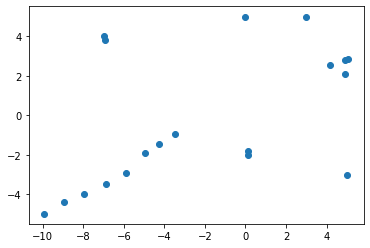

In [2]:
c1 = pd.read_csv("C1.txt", delim_whitespace=True, names=['x0', 'x1'])
print (c1)
plt.scatter(c1['x0'],c1['x1'])

In [0]:
def avg(cluster):
    if len(cluster) < 0:
        return
    current_sum = cluster[0]
    for i in range(1,len(cluster)):
        current_sum = np.add(current_sum , cluster[i])
    # Divide by total samples
    for k in range(len(current_sum)):
        current_sum[k]  = current_sum[k]/len(cluster)
    return current_sum

In [0]:
def mean_distance(clusters ,cluster_num):
    print('first cluster | ','second cluster | ', 'distance')
    while len(clusters) is not cluster_num:
        # Clustering           (
        closest_distance=clust_1=clust_2 = math.inf
        # for every cluster (until second last element)
        for cluster_id, cluster in enumerate(clusters[:len(clusters)]): 
            cluster_avg = avg(cluster)
            for cluster2_id, cluster2 in enumerate(clusters[(cluster_id+1):]): 
                cluster2_avg = avg (cluster2)
                if distance.euclidean(cluster_avg,cluster2_avg) < closest_distance:
                    closest_distance = distance.euclidean(cluster_avg,cluster2_avg)
                    clust_1 = cluster_id
                    clust_2 = cluster2_id+cluster_id+1
        print(clust_1,' | ',clust_2, ' | ',closest_distance)
        clusters[clust_1].extend(clusters[clust_2]) 
        clusters.pop(clust_2) 
    return(clusters)

In [0]:
### Hierarchical clustering
def hierarchical(data, cluster_num):
    # initialization of clusters at first (every point is a cluster)
    init_clusters=[]
    for index, row in data.iterrows():
        init_clusters.append([[row['x0'], row['x1']]])
    return mean_distance(init_clusters, cluster_num)

first cluster |  second cluster |  distance
10  |  12  |  0.16944488242854633
13  |  14  |  0.19528929532997621
0  |  1  |  0.21391809640396484
9  |  10  |  0.7356692785483661
9  |  10  |  0.8268857474710963
6  |  7  |  0.8426573444474812
2  |  3  |  1.0712595569036494
3  |  4  |  1.1447658914304835
4  |  5  |  1.3403466527683667
1  |  2  |  1.65351856976932
2  |  3  |  2.8045414127112185
3  |  7  |  2.9874825241339704
1  |  2  |  4.506896584930611
2  |  5  |  4.815686959793644
3  |  4  |  5.0082485659887
[[-6.91  3.8 ]
 [-6.99  4.  ]]
[[-9.92 -4.98]
 [-8.96 -4.41]
 [-7.98 -3.98]
 [-6.91 -3.47]
 [-5.91 -2.91]
 [-4.94 -1.91]
 [-4.24 -1.44]
 [-3.45 -0.97]]
[[4.91 2.82]
 [5.07 2.88]
 [4.93 2.12]
 [4.15 2.56]
 [3.01 5.01]
 [0.   5.  ]]
[[ 0.13 -1.8 ]
 [ 0.1  -2.  ]
 [ 5.   -3.  ]]


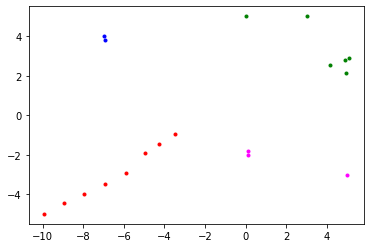

In [16]:
clusters = hierarchical(c1,4)
colors = ['blue', 'red', 'green', 'magenta']
for i in clusters:
    print(np.around(i,2))
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=3, color=colors[cluster_index])